# Building a Pie Chart

This assignment looks at building a pie chart to examine the email domains of users in a sample file.

## Import Libraries
---

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Importing the Data
---

In [17]:
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
df = pd.read_csv(url, na_values=['NA'], skiprows=23)
df['date'] = pd.to_datetime(df['date'])


/tmp/ipykernel_4051/2650859344.py:2: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, na_values=['NA'], skiprows=23)
/tmp/ipykernel_4051/2650859344.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


In [18]:
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


## Tasks: Part 1
---

Text(0.5, 1.0, 'Hourly Temperature at Knock Airport')

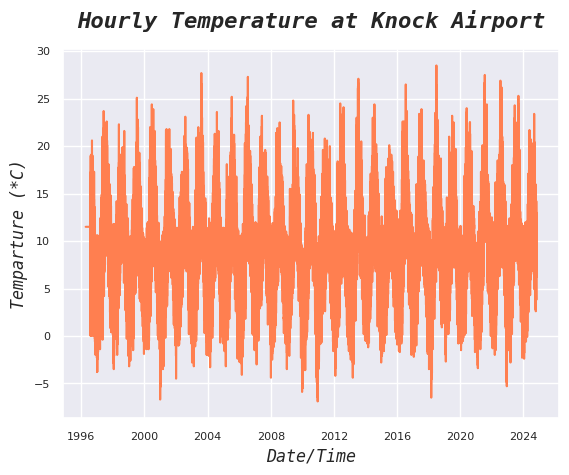

In [35]:
# The temperature

sns.set_theme(style="darkgrid")
ax= sns.lineplot(data=df, x="date", y="temp", color='coral')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Temparture (*C)', fontsize=12, style='italic', family='monospace')
ax.set_title('Hourly Temperature at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)

Text(0.5, 1.0, 'Average Daily Temperature at Knock Airport')

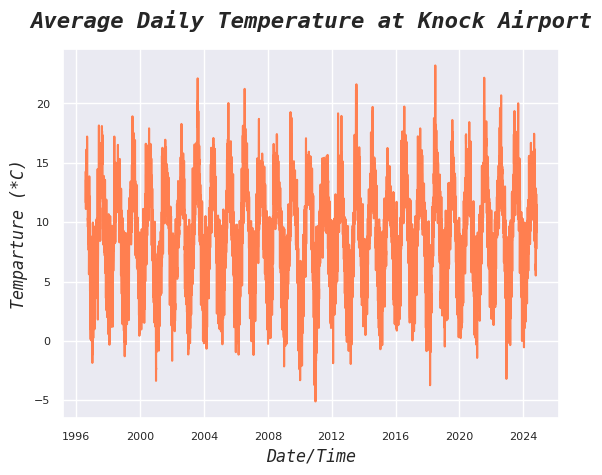

In [36]:
# The mean temperature each day

tempy = df["temp"].resample('1d').mean()

sns.set_theme(style="darkgrid")
ax= sns.lineplot(data=df, x="date", y=tempy, color= 'coral')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Temparture (*C)', fontsize=12, style='italic', family='monospace')
ax.set_title('Average Daily Temperature at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)

/tmp/ipykernel_4051/3539730969.py:3: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  tempm = df["temp"].resample('1m').mean()


Text(0.5, 1.0, 'Average Monthly Temperature at Knock Airport')

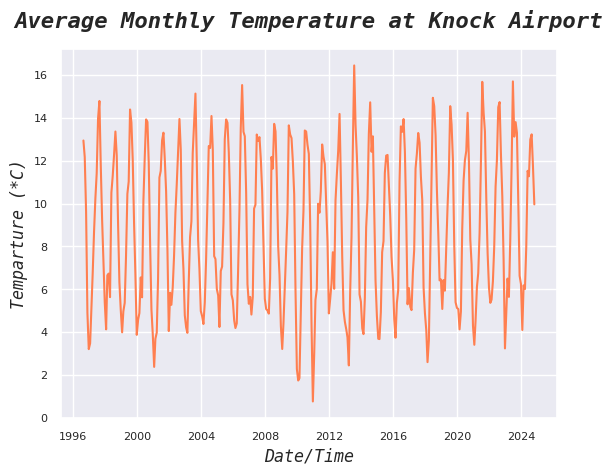

In [34]:
# The mean temperature for each month

tempm = df["temp"].resample('1m').mean()

sns.set_theme(style="darkgrid")
ax= sns.lineplot(data=df, x="date", y=tempm, color='coral')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Temparture (*C)', fontsize=12, style='italic', family='monospace')
ax.set_title('Average Monthly Temperature at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)

## Tasks: Part 2
---

In [22]:
# The Windspeed
df.replace(" ", pd.NA, inplace=True)

### Need to ask the lecturer about this bit
df = df.apply(pd.to_numeric)
def interpolate_averages(series):
    return series.interpolate(method='linear', limit_direction='both')
for col in df.select_dtypes(include='number').columns:
    df[col] = interpolate_averages(df[col])


Text(0.5, 1.0, 'Hourly Windspeed at Knock Airport')

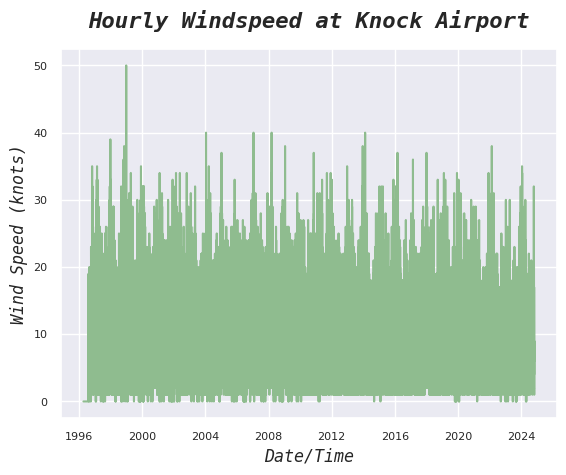

In [30]:
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=df, x="date", y="wdsp", color='darkseagreen')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, style='italic', family='monospace')
ax.set_title('Hourly Windspeed at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)

In [24]:
# The rolling windspeed (24hrs)

wsr = df['wdsp'].rolling(window="24h").mean()


Text(0.5, 1.0, 'Rolling Average 24hr Windspeed at Knock Airport')

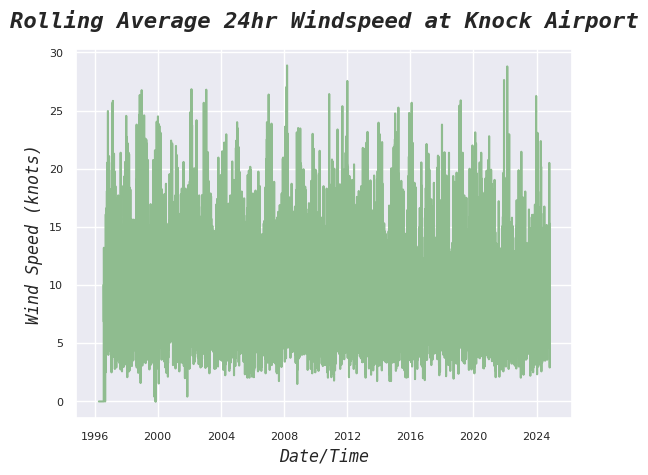

In [31]:
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=df, x="date", y=wsr, color='darkseagreen')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, style='italic', family='monospace')
ax.set_title('Rolling Average 24hr Windspeed at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)


In [26]:
# The max windspeed for each day

wsmx = df['wdsp'].resample("1d").max()

Text(0.5, 1.0, 'Daily Max Windspeed at Knock Airport')

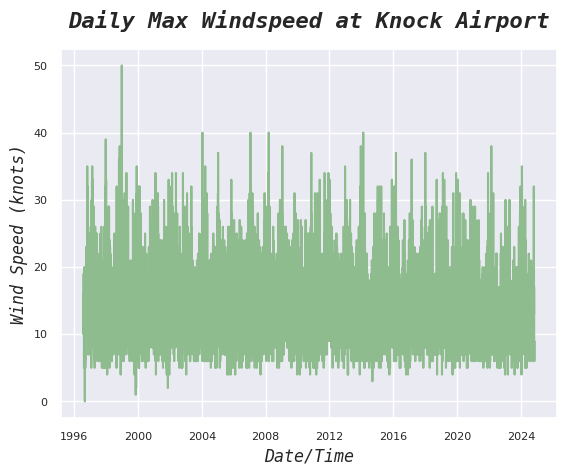

In [32]:
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=df, x="date", y=wsmx, color='darkseagreen')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, style='italic', family='monospace')
ax.set_title('Daily Max Windspeed at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)

In [28]:
# The monthly mean of the daily max windspeeds
wsmm = wsmx.resample("1m").mean()

/tmp/ipykernel_4051/207488202.py:2: FutureWarning: 'm' is deprecated and will be removed in a future version, please use 'ME' instead.
  wsmm = wsmx.resample("1m").mean()


Text(0.5, 1.0, 'Monthly Mean of the Daily Max Windspeed at Knock Airport')

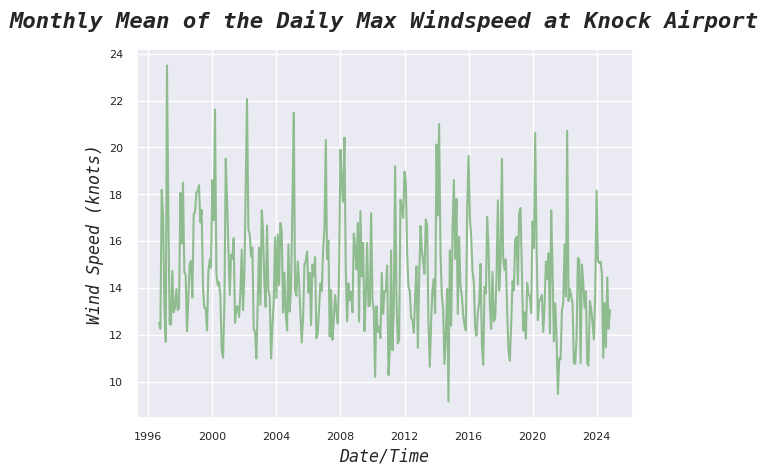

In [33]:
sns.set_theme(style="darkgrid")
ax=sns.lineplot(data=df, x="date", y=wsmm, color='darkseagreen')
ax.tick_params(axis='x', labelsize=8)
ax.tick_params(axis='y', labelsize=8)
ax.set_xlabel('Date/Time', fontsize=12, style='italic', family='monospace')
ax.set_ylabel('Wind Speed (knots)', fontsize=12, style='italic', family='monospace')
ax.set_title('Monthly Mean of the Daily Max Windspeed at Knock Airport', fontsize=16, fontweight='bold', style='italic', family='monospace', pad =15)


# END